# The HFM library - A fast marching solver with adaptive stencils

## Part : Application examples
## Chapter : Fisher-Rao distances

The application examples presented in this notebook were suggested by Stephen Taylor,
Assistant Professor of Finance at NJIT.


## The fisher-Rao metric

Consider a probability distribution, defined by a density $p(x,\theta)$ w.r.t.\ some base measure denoted ${\rm d} x$ on a probability space $X$. Our probability distribution also depends on a $\theta$ within some open domain $\Theta \subset \mathbb R^n$.
The Fisher-Rao metric, or Fisher information metric, is a Riemannian metric on the parameter space $\Theta$. It is defined as follows:
\begin{equation*}
	{\mathcal M}(\theta) 
    := E[\nabla_\theta \ln p \otimes \nabla_\theta \ln p] 
    = \int_X \nabla_\theta \ln p(x,\theta) \, \nabla_\theta \ln p(x,\theta)^T \, p(x,\theta) {\rm d} x.
\end{equation*}
Interestingly, thanks to an algebraic simplification, the Fisher-Rao metric is also the negative mean of a hessian.
\begin{equation*}
	-{\mathcal M}(\theta) = E[\nabla^2_\theta \ln p] = \int_X \nabla^2_\theta \ln p(x,\theta) \, p(x,\theta) {\rm d} x.
\end{equation*}

[**Summary**](Summary.ipynb) of volume Fast Marching Methods, this series of notebooks.

[**Main summary**](../Summary.ipynb) of the Adaptive Grid Discretizations 
	book of notebooks, including the other volumes.

# Table of contents
  * [1. The univariate Gaussian](#1.-The-univariate-Gaussian)



This Python&reg; notebook is intended as documentation and testing for the [HamiltonFastMarching (HFM) library](https://github.com/mirebeau/HamiltonFastMarching), which also has interfaces to the Matlab&reg; and Mathematica&reg; languages. 
More information on the HFM library in the manuscript:
* Jean-Marie Mirebeau, Jorg Portegies, "Hamiltonian Fast Marching: A numerical solver for anisotropic and non-holonomic eikonal PDEs", 2019 [(link)](https://hal.archives-ouvertes.fr/hal-01778322)

Copyright Jean-Marie Mirebeau, University Paris-Sud, CNRS, University Paris-Saclay

## 0. Importing the required libraries.

<!---In this series of notebooks, input and output to the HamiltonFastMarching library is based on files written on the disk. This particularly simple to install, but a bit ugly and not much scalable. Alternatively direct link based on boost-python is also available, as discussed in the [summary](http://nbviewer.jupyter.org/urls/rawgithub.com/Mirebeau/HFM_Python_Notebooks/master/Summary.ipynb).--->

In [1]:
import sys; sys.path.insert(0,"..") # Allow import of agd from parent directory (useless if conda package installed)
#from Miscellaneous import TocTools; print(TocTools.displayTOC('FisherRao','FMM'))

In [2]:
from agd import HFMUtils
from agd.HFMUtils import GetGeodesics
from agd.Plotting import savefig; #savefig.dirName = 'Figures/FisherRao'

In [3]:
# We will also need some standard python libraries.
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

## 1. The univariate Gaussian

Gaussian distributions on the real line are determined by two parameters: their mean $\mu$, and standard deviation $\sigma$. The parameter is thus a pair $\theta = (\mu,\sigma)$ in the half space $\mathbb R \times \mathbb R^{++}$.
\begin{equation*}
p(x, (\mu,\sigma)) := \frac 1 {\sqrt{2 \pi \sigma^2}} \exp\Big( - \frac{(x-\mu)^2}{2 \sigma^2}\Big).
\end{equation*}

In [4]:
hfmInput = {} 
hfmInput['model'] = 'Riemann2' # Adequate model for two dimensional Riemannian metrics.
hfmInput['arrayOrdering'] = 'YXZ_RowMajor' # Compatibility with numpy.meshgrid and pyplot

In this notebook, we compute distance maps and minimal geodesics for this metric, on the subdomain 
$[-2,2] \times [0,1]$, that we discretize on a $4n \times n$ grid.

In [5]:
# Create the parameter space
n=100
hfmInput.update(HFMUtils.Rect(sides=[[-2,2],[0,1]],dimx=4*n))
mu,sig = HFMUtils.GetGrid(hfmInput)

The Fisher-Rao metric has a simple and explicit expression:
\begin{equation*}
    \mathcal M(\theta) := 
    \frac 1 {\sigma^2}
    \begin{pmatrix}
    1 & 0 \\
    0 & 2
    \end{pmatrix}.
\end{equation*}

In [6]:
hfmInput['metric'] = np.stack( (1./sig**2, 0.*sig, 2./sig**2), 2)                          
# In view of the specific form of the metric, the simpler model Isotropic2 would also have fitted.

We next set the seed for our front propagation, and the tips from where geodesics are backtracked.

In [7]:
hfmInput['seeds'] = np.array([ [0,0.3] ]) # A single seed
hfmInput['tips'] = np.array([ (x,y) for y in HFMUtils.CenteredLinspace(0,1,3) 
                             for x in HFMUtils.CenteredLinspace(-2,2,4)]) # 12 tips

In [8]:
hfmInput['exportValues'] = 1
hfmInput['order'] = 2

In [9]:
hfmOutput = HFMUtils.Run(hfmInput)

Field verbosity defaults to 1
Field spreadSeeds defaults to -1
Field showProgress defaults to 0
Field factoringMethod defaults to None
Fast marching solver completed in 0.016065 s.
Field geodesicSolver defaults to Discrete
Field geodesicStep defaults to 0.25
Field geodesicWeightThreshold defaults to 0.001
Field geodesicVolumeBound defaults to 8.45
Field exportActiveNeighs defaults to 0
Field exportGeodesicFlow defaults to 0



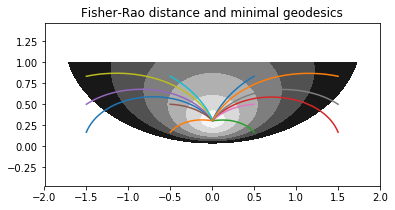

In [10]:
fig = plt.figure(figsize=[6,3]); plt.title('Fisher-Rao distance and minimal geodesics'); plt.axis('equal'); 
plt.contourf(mu,sig,hfmOutput['values'],cmap='Greys',levels=np.linspace(0,3,7));  # Display the value function. 
for geo in GetGeodesics(hfmOutput):  plt.plot(geo[:,0],geo[:,1]) 
savefig(fig,"FisherRao_Gaussian1D.png")

Interestingly, by a suitable rescaling of the axes, the level lines of the distance function, and the geodesics, are turned into (euclidean) circles.

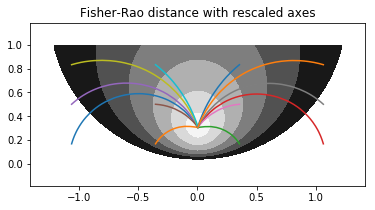

In [11]:
rho = 1./np.sqrt(2)
fig = plt.figure(figsize=[6,3]); plt.title('Fisher-Rao distance with rescaled axes'); plt.axis('equal'); 
plt.contourf(rho*mu,sig,hfmOutput['values'],cmap='Greys',levels=np.linspace(0,3,7));  # Display the value function.
for geo in GetGeodesics(hfmOutput):  plt.plot(rho*geo[:,0],geo[:,1]) 